In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
games = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
games['Name'].nunique()

11562

In [4]:
games.loc[games['Name']=='Madden NFL 08']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
597,Madden NFL 08,PS2,2007.0,Sports,Electronic Arts,2.14,0.08,0.0,0.35,2.57,78.0,11.0,7.8,17.0,EA Tiburon,E
667,Madden NFL 08,X360,2007.0,Sports,Electronic Arts,2.18,0.01,0.0,0.18,2.37,85.0,46.0,6.4,108.0,EA Tiburon,E
2116,Madden NFL 08,PS3,2007.0,Sports,Electronic Arts,0.89,0.00,0.0,0.08,0.97,81.0,31.0,5.3,33.0,EA Tiburon,E
2377,Madden NFL 08,Wii,2007.0,Sports,Electronic Arts,0.80,0.00,0.0,0.07,0.87,76.0,29.0,6.8,27.0,EA Tiburon,E
2880,Madden NFL 08,PSP,2007.0,Sports,Electronic Arts,0.60,0.04,0.0,0.07,0.71,75.0,10.0,6.8,8.0,EA Tiburon,E
6024,Madden NFL 08,XB,2007.0,Sports,Electronic Arts,0.22,0.06,0.0,0.01,0.29,76.0,6.0,6,4.0,EA Tiburon,E
6590,Madden NFL 08,DS,2007.0,Sports,Electronic Arts,0.23,0.00,0.0,0.02,0.25,71.0,11.0,tbd,NaN,Exient Entertainment,E
11688,Madden NFL 08,GC,2007.0,Sports,Electronic Arts,0.06,0.02,0.0,0.00,0.08,75.0,4.0,7,7.0,EA Tiburon,E


In [5]:
games.loc[games['Name'].isin((games['Name'].value_counts()>1))]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [6]:
games.shape

(16719, 16)

In [7]:
games.shape

(16719, 16)

In [8]:
games['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
games["Publisher"].nunique()

581

In [10]:
np.sort(games['Year_of_Release'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [11]:
games.loc[games['Year_of_Release']>2016.0]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
ign = pd.read_csv('./ign.csv')
ign.head(10)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
6,6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
7,7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
8,8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11
9,9,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012,9,11


In [14]:
games.loc[games['Name']=="Assassin's Creed"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
160,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.64,0.07,0.56,5.54,81.0,77.0,7.7,1074.0,Ubisoft Montreal,M
219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.82,4.82,81.0,40.0,7.3,769.0,Ubisoft Montreal,M
2276,Assassin's Creed,PC,2008.0,Adventure,Ubisoft,0.01,0.83,0.00,0.07,0.91,NaN,NaN,NaN,NaN,NaN,NaN


# EDA (Main dataset) 
### Data cleaning

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [16]:
games.loc[games['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Lets just drop the above 2
games.drop([659, 14246], inplace=True)

In [18]:
games.loc[games['Year_of_Release']==2020.0]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [19]:
games.drop(games.index[games['Year_of_Release']==2020.0],inplace=True)

In [20]:
games.loc[games['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,92.0,72.0,8.2,178.0,Harmonix Music Systems,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.51,0.61,0.00,0.21,2.34,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
719,Call of Duty 3,Wii,NaN,Shooter,Activision,1.17,0.84,0.00,0.23,2.24,69.0,42.0,6.7,61.0,Exakt,T
805,Rock Band,Wii,NaN,Misc,MTV Games,1.33,0.56,0.00,0.20,2.08,80.0,21.0,6.3,37.0,Harmonix Music Systems,T


In [21]:
games.loc[games.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#No. of games released by year
releasebyyear = games.groupby(['Year_of_Release','Genre'])[['Name']].count()
releasebyyear.reset_index()

,Year_of_Release,Genre,Name
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1
5,1981.0,Action,25
6,1981.0,Platform,3
7,1981.0,Puzzle,2
8,1981.0,Racing,1
9,1981.0,Shooter,10


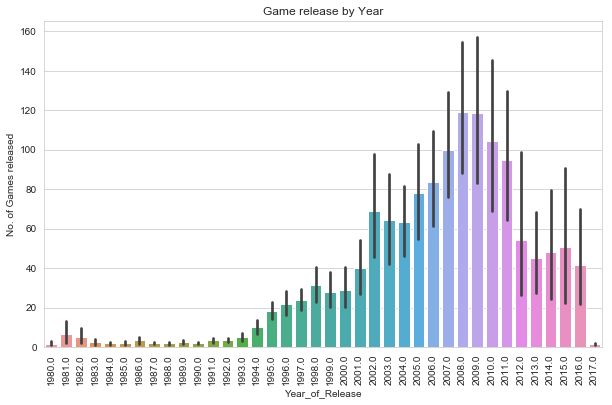

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = 'Year_of_Release', y = 'Name', data = releasebyyear.reset_index())
#ax.set_xticks([1980,2000,2020])
ax.set_ylabel('No. of Games released')
ax.set_title('Game release by Year')
plt.xticks(rotation=90)
plt.show()


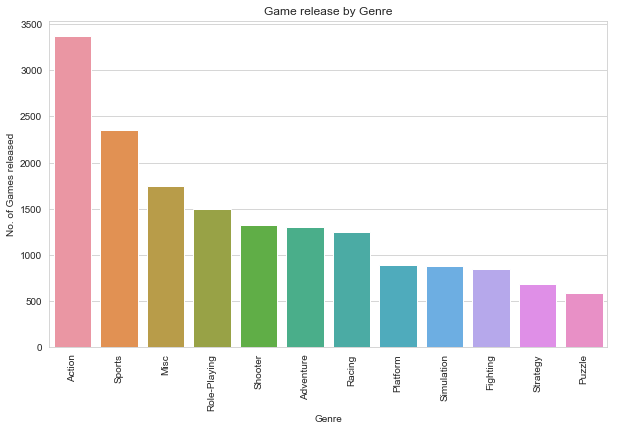

In [24]:
#Top values in dataset
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Genre',y='Name', data = games.groupby(['Genre'])['Name'].count().sort_values(ascending=False).reset_index())
ax.set_ylabel('No. of Games released')
ax.set_title('Game release by Genre')
plt.xticks(rotation=90)
plt.show()

In [25]:
games['Publisher'].nunique()

581

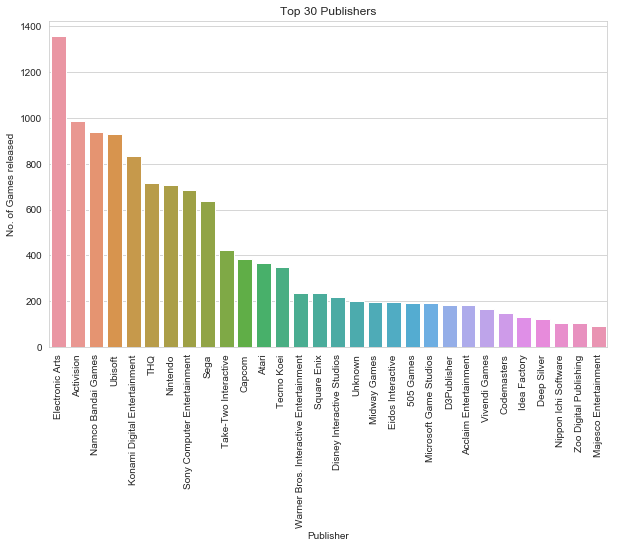

In [26]:
#Top 30 publishers
toppublisher =games.groupby(['Publisher'])['Name'].count().sort_values(ascending=False).head(30).reset_index()
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Publisher',y='Name', data = toppublisher)
ax.set_ylabel('No. of Games released')
ax.set_title('Top 30 Publishers')
plt.xticks(rotation=90)
plt.show()

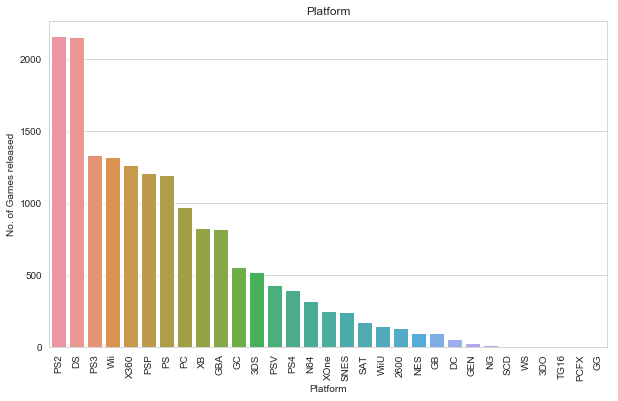

In [27]:
#Games by Platform
toppublisher =games.groupby(['Platform'])['Name'].count().sort_values(ascending=False).reset_index()
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Platform',y='Name', data = toppublisher)
ax.set_ylabel('No. of Games released')
ax.set_title('Platform')
plt.xticks(rotation=90)
plt.show()

In [28]:
games['score_group'] = games['Critic_Score'].apply(lambda x : '0-49' if x<50 else '50-59' if x<60 else '60-69' if x<70 else '70-79' if x<80 else '80-89' if x<90 else '90-100' if x <=100 else np.nan)
games['score_group'].head()

0    70-79
1      NaN
2    80-89
3    80-89
4      NaN
Name: score_group, dtype: object

In [29]:
scored = games.drop(games.index[games['score_group'].isnull()])
scored

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,score_group
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,70-79
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,80-89
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,80-89
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,80-89
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,50-59
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,80-89
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,90-100
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,80-89
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,60-69
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,80-89


In [30]:
scored.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.020093,0.011411,0.223407,0.196867
NA_Sales,-0.002386,1.000000,0.840590,0.468787,0.728123,0.955705,0.240755,0.295413,0.244492
EU_Sales,0.050745,0.840590,1.000000,0.520103,0.718046,0.938926,0.220752,0.277533,0.282624
JP_Sales,-0.026317,0.468787,0.520103,1.000000,0.396889,0.613566,0.152593,0.180219,0.072427
Other_Sales,0.053747,0.728123,0.718046,0.396889,1.000000,0.805510,0.198554,0.251639,0.239171
Global_Sales,0.020093,0.955705,0.938926,0.613566,0.805510,1.000000,0.245471,0.303571,0.262935
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.196867,0.244492,0.282624,0.072427,0.239171,0.262935,0.264376,0.362334,1.000000


In [31]:
def correlation_heat_map(df):

    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap = 'RdBu_r', center=0)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

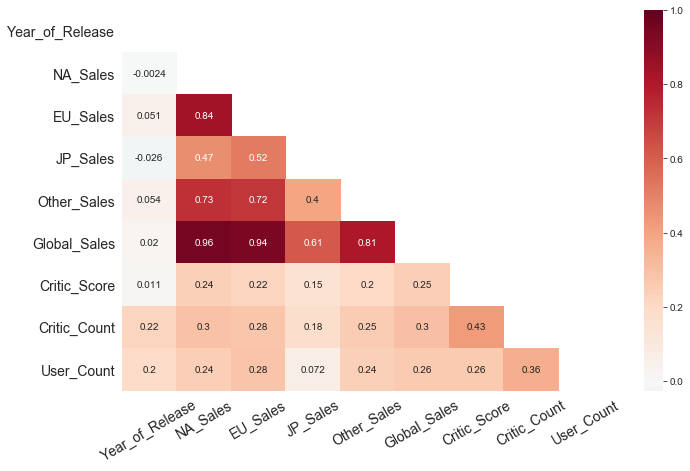

In [32]:
correlation_heat_map(scored)

In [33]:
NAsum = games['NA_Sales'].sum()
Gsum = games['Global_Sales'].sum()
EUsum = games['EU_Sales'].sum()
JPsum = games['JP_Sales'].sum()
Osum = games['Other_Sales'].sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BEAA72978>],
      dtype=object)

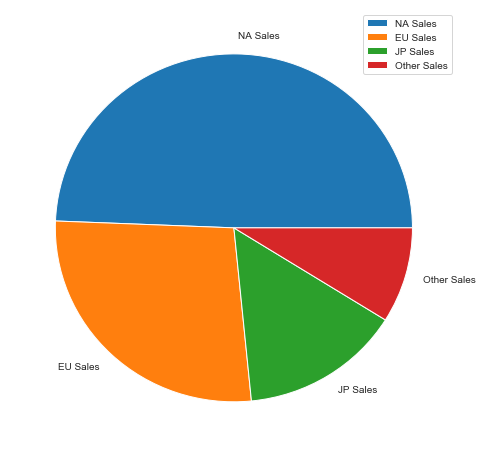

In [34]:
df = pd.DataFrame([NAsum,EUsum,JPsum,Osum], index=['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'], columns=[''])
 
# make the multiple plot
df.plot(kind='pie', subplots=True, figsize=(8,8))


In [35]:
tab = scored.groupby(['Genre','score_group'])['Global_Sales'].median().reset_index()

Text(0.5,1,'Genre vs Critic Score (by median sales)')

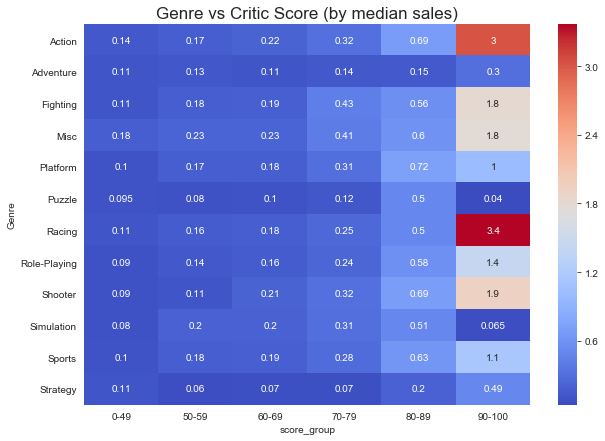

In [36]:
fig = plt.subplots(figsize=(10,7))
ax = sns.heatmap(tab.pivot(index='Genre', columns='score_group', values='Global_Sales'), cmap="coolwarm", annot = True)
ax.set_title('Genre vs Critic Score (by median sales)', fontsize = 17)

In [37]:
toppublisher =games.groupby(['Publisher'])['Name'].count().sort_values(ascending=False).head(30).reset_index()
toppublisher
pubindex = list(toppublisher['Publisher'])
pubindex

['Electronic Arts',
 'Activision',
 'Namco Bandai Games',
 'Ubisoft',
 'Konami Digital Entertainment',
 'THQ',
 'Nintendo',
 'Sony Computer Entertainment',
 'Sega',
 'Take-Two Interactive',
 'Capcom',
 'Atari',
 'Tecmo Koei',
 'Warner Bros. Interactive Entertainment',
 'Square Enix',
 'Disney Interactive Studios',
 'Unknown',
 'Midway Games',
 'Eidos Interactive',
 '505 Games',
 'Microsoft Game Studios',
 'D3Publisher',
 'Acclaim Entertainment',
 'Vivendi Games',
 'Codemasters',
 'Idea Factory',
 'Deep Silver',
 'Nippon Ichi Software',
 'Zoo Digital Publishing',
 'Majesco Entertainment']

In [38]:
pubscored = scored[scored['Publisher'].isin(pubindex)]
pubscored

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,score_group
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,70-79
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,80-89
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,80-89
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,80-89
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,50-59
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,80-89
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,90-100
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,80-89
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,60-69
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,80-89


Text(0.5,1,'Publisher vs Critic Score (by median sales)')

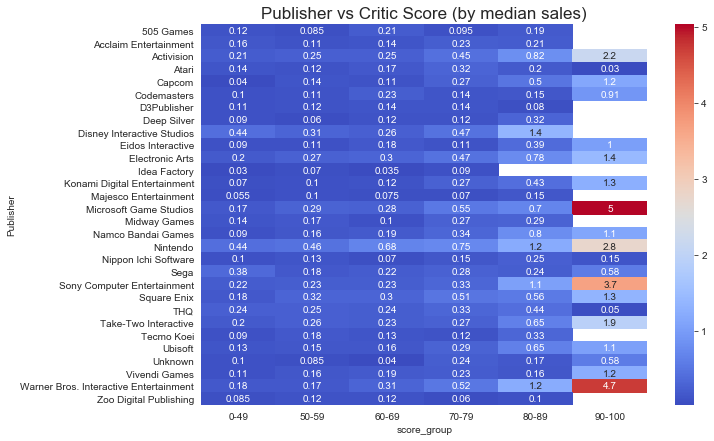

In [39]:
tab = pubscored.groupby(['Publisher','score_group'])['Global_Sales'].median().reset_index()
fig = plt.subplots(figsize=(10,7))
ax = sns.heatmap(tab.pivot(index='Publisher', columns='score_group', values='Global_Sales'), cmap="coolwarm", annot = True)
ax.set_title('Publisher vs Critic Score (by median sales)', fontsize = 17)

Text(0.5,1,'Platform vs Critic Score (by median sales)')

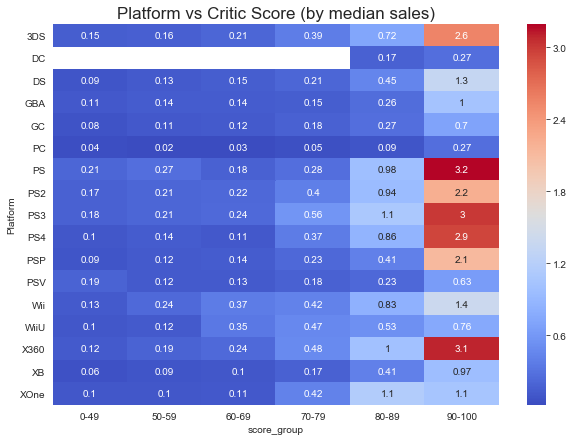

In [40]:
tab = scored.groupby(['Platform','score_group'])['Global_Sales'].median().reset_index()
fig = plt.subplots(figsize=(10,7))
ax = sns.heatmap(tab.pivot(index='Platform', columns='score_group', values='Global_Sales'), cmap="coolwarm", annot = True)
ax.set_title('Platform vs Critic Score (by median sales)', fontsize = 17)

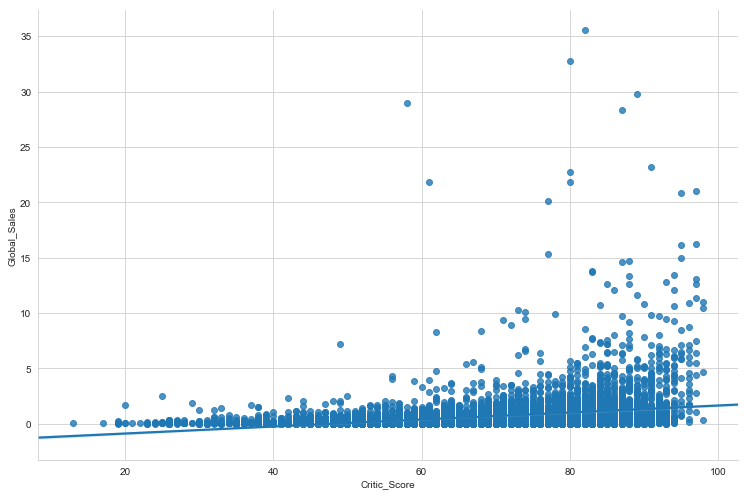

In [41]:
#Critic score vs total sales
sns.lmplot(x='Critic_Score',y='Global_Sales', data = scored.drop(scored.index[scored['Global_Sales']>80]), fit_reg=True, height=7, aspect=1.5)

In [42]:
scored.loc[scored['Global_Sales']>80]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,score_group
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,70-79


# Weekly Sales Data EDA

In [43]:
Global = pd.read_csv('./GlobalWeeklySales.csv', index_col=False)
Global.shape

(52939, 9)

In [44]:
Global = Global.drop('Unnamed: 0', axis=1)

In [45]:
Global

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending
0,Super Mario 64 DS,DS,Nintendo,Platform,"261,853","261,853",1,2004-11-27
1,Spider-Man 2,DS,Activision,Action,"47,719","47,719",1,2004-11-27
2,Madden NFL 2005,DS,Electronic Arts,Sports,"41,021","41,021",1,2004-11-27
3,The Urbz: Sims In the City (US weekly sales),DS,Electronic Arts,Simulation,"32,889","32,889",1,2004-11-27
4,Asphalt: Urban GT,DS,Ubisoft,Racing,"30,525","30,525",1,2004-11-27
5,Feel the Magic XY/XX,DS,Sega,Puzzle,"14,727","14,727",1,2004-11-27
6,Super Mario 64 DS,DS,Nintendo,Platform,"244,885","506,738",2,2004-12-04
7,WarioWare Touched!,DS,Nintendo,Puzzle,"137,254","137,254",1,2004-12-04
8,NaN,DS,Nintendo,Racing,"54,801","54,801",1,2004-12-04
9,Spider-Man 2,DS,Activision,Action,"41,732","89,451",2,2004-12-04


In [46]:
Global.sample(10)

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending
24934,Top Spin 4,PS3,Take-Two Interactive,Sports,Pro,NaN,17,2011-07-09
34976,Toushin Toshi,3DS,imageepoch Inc.,Role-Playing,Pro,NaN,1,2014-02-01
842,Retro Atari Classics,DS,Atari,Misc,Pro,NaN,9,2005-05-07
6574,Monster Hunter Freedom,PSP,Capcom,Role-Playing,Pro,NaN,48,2006-10-28
16393,Call of Duty 4: Modern Warfare,X360,Activision,Shooter,Pro,NaN,78,2009-05-02
33855,F1 2013,X360,Codemasters,Action,Pro,NaN,3,2013-10-19
5369,World of Warcraft,PC,Activision,Role-Playing,Pro,NaN,85,2006-07-08
30734,Super Mario Galaxy,Wii,Nintendo,Platform,Pro,NaN,268,2012-12-29
2029,Spider-Man 2,PSP,Activision,Action,"30,111","177,068",25,2005-09-03
48712,Watch Dogs 2,PS4,Ubisoft,Action,Pro,NaN,38,2017-08-05


In [47]:
Global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52939 entries, 0 to 52938
Data columns (total 8 columns):
Name            52347 non-null object
Platform        52939 non-null object
Publisher       52935 non-null object
Genre           52939 non-null object
Weekly_Sales    52939 non-null object
Total_Sales     21420 non-null object
Week_No.        52939 non-null int64
Week_Ending     52939 non-null object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [48]:
Global.loc[Global['Weekly_Sales']=='Pro']

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending
382,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,Pro,NaN,16,2005-03-05
413,Tennis no Oji-Sama: 2005 Crystal Drive,DS,Konami Digital Entertainment,Sports,Pro,NaN,11,2005-03-12
414,Mahjong Taikai,DS,Tecmo Koei,Misc,Pro,NaN,15,2005-03-12
415,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,Pro,NaN,17,2005-03-12
446,Kenshuui Tendo Dokuta,DS,Spike,Simulation,Pro,NaN,16,2005-03-19
447,Sprung - A Game Where Everyone Scores,DS,Ubisoft,Adventure,Pro,NaN,15,2005-03-19
448,Puyo Pop Fever,PSP,Ignition Entertainment,Puzzle,Pro,NaN,13,2005-03-19
449,Tennis no Oji-Sama: 2005 Crystal Drive,DS,Konami Digital Entertainment,Sports,Pro,NaN,12,2005-03-19
450,Mahjong Taikai,DS,Tecmo Koei,Misc,Pro,NaN,16,2005-03-19
451,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,Pro,NaN,18,2005-03-19


In [49]:
glb = Global.drop(Global.index[Global['Weekly_Sales']=='Pro'])

In [50]:
glb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21502 entries, 0 to 52893
Data columns (total 8 columns):
Name            21181 non-null object
Platform        21502 non-null object
Publisher       21502 non-null object
Genre           21502 non-null object
Weekly_Sales    21502 non-null object
Total_Sales     21420 non-null object
Week_No.        21502 non-null int64
Week_Ending     21502 non-null object
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [51]:
glb['Week_Ending'] = pd.to_datetime(glb['Week_Ending'])

In [52]:
glb['Year'] = glb['Week_Ending'].apply(lambda x : x.year)
glb['Year']

0        2004
1        2004
2        2004
3        2004
4        2004
5        2004
6        2004
7        2004
8        2004
9        2004
10       2004
11       2004
12       2004
13       2004
14       2004
15       2004
16       2004
17       2004
18       2004
19       2004
20       2004
21       2004
22       2004
23       2004
24       2004
25       2004
26       2004
27       2004
28       2004
29       2004
         ... 
52864    2018
52865    2018
52866    2018
52867    2018
52868    2018
52869    2018
52870    2018
52871    2018
52872    2018
52873    2018
52874    2018
52875    2018
52876    2018
52877    2018
52878    2018
52879    2018
52880    2018
52881    2018
52882    2018
52883    2018
52884    2018
52885    2018
52886    2018
52887    2018
52888    2018
52889    2018
52890    2018
52891    2018
52892    2018
52893    2018
Name: Year, Length: 21502, dtype: int64

In [53]:
glb['Month'] = glb['Week_Ending'].apply(lambda x : x.month)

In [54]:
glb['Date'] = glb['Week_Ending'].apply(lambda x : x.day)

In [55]:
glb['Date'] = glb['Week_Ending'].apply(lambda x : x.day)

In [56]:
glb['Date']

0        27
1        27
2        27
3        27
4        27
5        27
6         4
7         4
8         4
9         4
10        4
11        4
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        4
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
52864     1
52865     1
52866     1
52867     1
52868     1
52869     1
52870     1
52871     1
52872     1
52873     1
52874     1
52875     1
52876     1
52877     1
52878     1
52879     1
52880     1
52881     1
52882     1
52883     1
52884     1
52885     1
52886     1
52887     1
52888     1
52889     1
52890     1
52891     1
52892     1
52893     1
Name: Date, Length: 21502, dtype: int64

In [57]:
glb['Weekly_Sales'] = glb['Weekly_Sales'].apply(lambda x: int(x.replace(',','')))
glb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21502 entries, 0 to 52893
Data columns (total 11 columns):
Name            21181 non-null object
Platform        21502 non-null object
Publisher       21502 non-null object
Genre           21502 non-null object
Weekly_Sales    21502 non-null int64
Total_Sales     21420 non-null object
Week_No.        21502 non-null int64
Week_Ending     21502 non-null datetime64[ns]
Year            21502 non-null int64
Month           21502 non-null int64
Date            21502 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 2.0+ MB


In [58]:
glb['Week_No.'] = glb['Week_No.'].apply(lambda x: int(x))
glb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21502 entries, 0 to 52893
Data columns (total 11 columns):
Name            21181 non-null object
Platform        21502 non-null object
Publisher       21502 non-null object
Genre           21502 non-null object
Weekly_Sales    21502 non-null int64
Total_Sales     21420 non-null object
Week_No.        21502 non-null int64
Week_Ending     21502 non-null datetime64[ns]
Year            21502 non-null int64
Month           21502 non-null int64
Date            21502 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 2.0+ MB


In [59]:
glb.loc[glb['Total_Sales'].isnull()]
        

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
20,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,3786,NaN,3,2004-12-04,2004,12,4
42,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,2043,NaN,4,2004-12-11,2004,12,11
68,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,2939,NaN,5,2004-12-18,2004,12,18
93,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,5427,NaN,6,2004-12-25,2004,12,25
120,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,3674,NaN,7,2005-01-01,2005,1,1
147,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,2842,NaN,8,2005-01-08,2005,1,8
179,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,980,NaN,9,2005-01-15,2005,1,15
207,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,747,NaN,10,2005-01-22,2005,1,22
235,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,583,NaN,11,2005-01-29,2005,1,29
263,The Urbz: Sims in the City (all regions sales),DS,Electronic Arts,Simulation,498,NaN,12,2005-02-05,2005,2,5


Text(0.5,1,'All game sales aggregated by year')

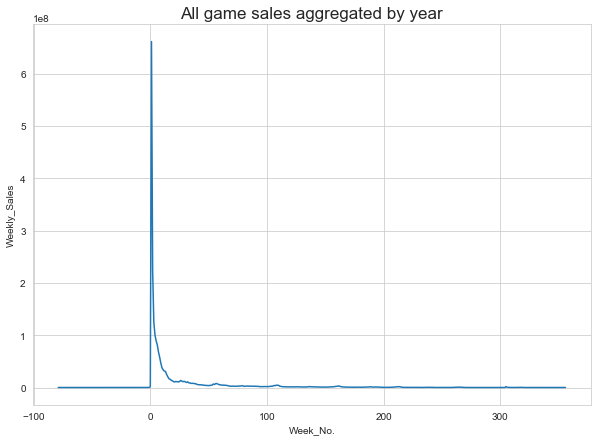

In [62]:
fig = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Week_No.', y='Weekly_Sales', data = glb.groupby(['Week_No.'])[['Weekly_Sales']].sum().reset_index())
ax.set_title('All game sales aggregated by year', fontsize = 17)

In [63]:
data = glb.groupby(['Week_No.'])[['Weekly_Sales']].sum().reset_index()
data = data.drop(data.index[data['Week_No.']<0])
data = data.drop(data.index[data['Week_No.']>20])
data

,Week_No.,Weekly_Sales
17,0,1627735
18,1,661145342
19,2,223429711
20,3,125358822
21,4,100212785
22,5,89111414
23,6,81404726
24,7,67957370
25,8,58063390
26,9,46936527


Text(0.5,1,'USA game sales aggregated by Week No.')

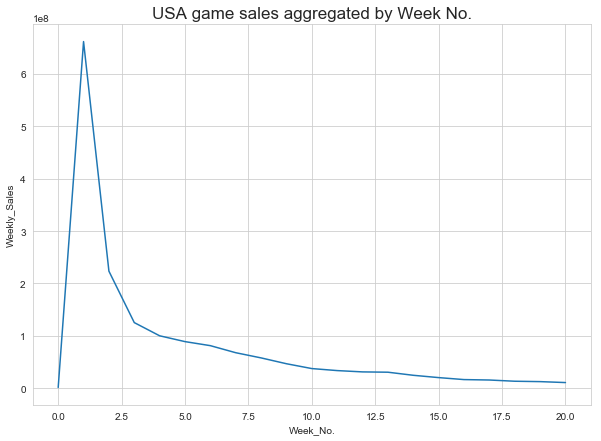

In [64]:
fig = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Week_No.', y='Weekly_Sales', data = data)
ax.set_title('USA game sales aggregated by Week No.', fontsize = 17)

In [86]:
#Analysing sample of 10 games.
sample = glb.sample(10)['Name']
sampledf = glb[glb['Name'].isin(sample)]
sampledf

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
2915,Call of Duty 2,X360,Activision,Shooter,265734,"265,734",2,2005-11-26,2005,11,26
2994,Call of Duty 2,X360,Activision,Shooter,91084,"356,818",3,2005-12-03,2005,12,3
3076,Call of Duty 2,X360,Activision,Shooter,50252,"407,070",4,2005-12-10,2005,12,10
3149,Call of Duty 2,X360,Activision,Shooter,59673,"466,743",5,2005-12-17,2005,12,17
3222,Call of Duty 2,X360,Activision,Shooter,81449,"548,192",6,2005-12-24,2005,12,24
3302,Call of Duty 2,X360,Activision,Shooter,40095,"588,287",7,2005-12-31,2005,12,31
3373,Call of Duty 2,X360,Activision,Shooter,42411,"630,698",8,2006-01-07,2006,1,7
3445,Call of Duty 2,X360,Activision,Shooter,41920,"672,618",9,2006-01-14,2006,1,14
3520,Call of Duty 2,X360,Activision,Shooter,38351,"710,969",10,2006-01-21,2006,1,21
3597,Call of Duty 2,X360,Activision,Shooter,34116,"745,085",11,2006-01-28,2006,1,28


In [87]:
sampledata = sampledf.drop(sampledf.index[sampledf['Week_No.']<0])
sampledata = sampledata.drop(sampledata.index[sampledata['Week_No.']>20])
sampledata

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
2915,Call of Duty 2,X360,Activision,Shooter,265734,"265,734",2,2005-11-26,2005,11,26
2994,Call of Duty 2,X360,Activision,Shooter,91084,"356,818",3,2005-12-03,2005,12,3
3076,Call of Duty 2,X360,Activision,Shooter,50252,"407,070",4,2005-12-10,2005,12,10
3149,Call of Duty 2,X360,Activision,Shooter,59673,"466,743",5,2005-12-17,2005,12,17
3222,Call of Duty 2,X360,Activision,Shooter,81449,"548,192",6,2005-12-24,2005,12,24
3302,Call of Duty 2,X360,Activision,Shooter,40095,"588,287",7,2005-12-31,2005,12,31
3373,Call of Duty 2,X360,Activision,Shooter,42411,"630,698",8,2006-01-07,2006,1,7
3445,Call of Duty 2,X360,Activision,Shooter,41920,"672,618",9,2006-01-14,2006,1,14
3520,Call of Duty 2,X360,Activision,Shooter,38351,"710,969",10,2006-01-21,2006,1,21
3597,Call of Duty 2,X360,Activision,Shooter,34116,"745,085",11,2006-01-28,2006,1,28


In [88]:
sampledata['Week_No.'] = sampledata['Week_No.'].astype(int)

Text(0.5,1,'Global Sales - Random sample of 10 games life cycle')

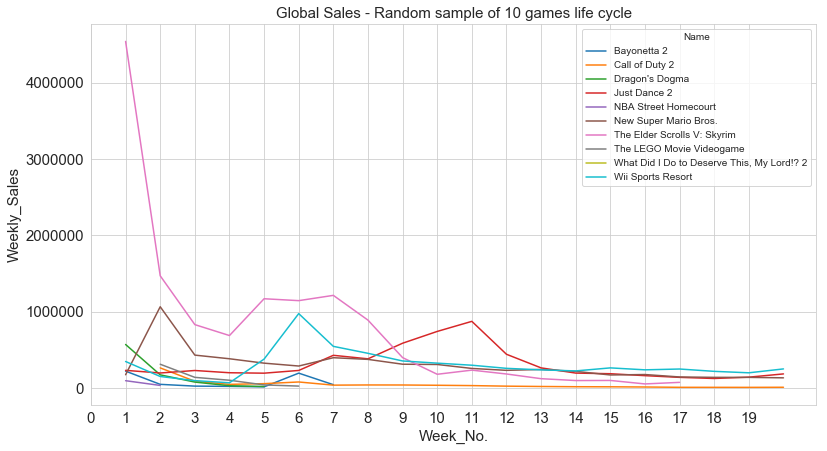

In [89]:
salestrend = sampledata.groupby(['Name','Week_No.'])[['Weekly_Sales']].sum()
ax = salestrend.reset_index().pivot(index='Week_No.',columns='Name',values='Weekly_Sales').plot(figsize=(13,7),fontsize=15,xticks=list(range(0,20)))
ax.set_xlabel('Week_No.', fontsize=15)
ax.set_ylabel('Weekly_Sales',fontsize=15)
ax.set_title('Global Sales - Random sample of 10 games life cycle', fontsize =15)

Text(0.5,1,'Global Sales - Random sample of 10 games life cycle')

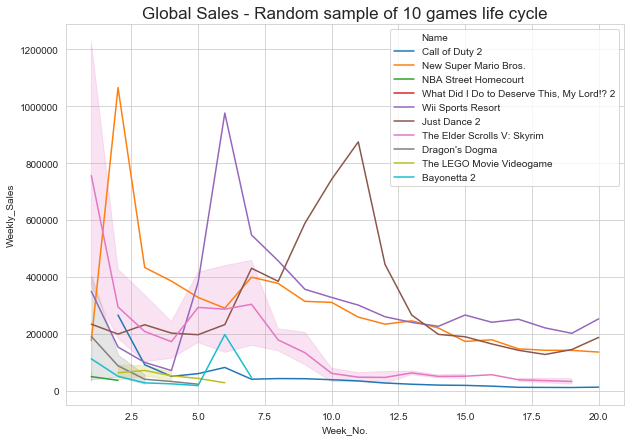

In [90]:
fig = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Week_No.', y='Weekly_Sales', hue='Name', data = sampledata)
ax.set_title('Global Sales - Random sample of 10 games life cycle', fontsize = 17)

In [94]:
sampledata['Total_Sales'] = sampledata['Total_Sales'].apply(lambda x: float(x.replace(',','')))
sampledata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 2915 to 51093
Data columns (total 11 columns):
Name            173 non-null object
Platform        173 non-null object
Publisher       173 non-null object
Genre           173 non-null object
Weekly_Sales    173 non-null int64
Total_Sales     173 non-null float64
Week_No.        173 non-null int32
Week_Ending     173 non-null datetime64[ns]
Year            173 non-null int64
Month           173 non-null int64
Date            173 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(4)
memory usage: 15.5+ KB


Text(0.5,1,'Global Sales - Random sample of 10 games life cycle, Cumulative Sales')

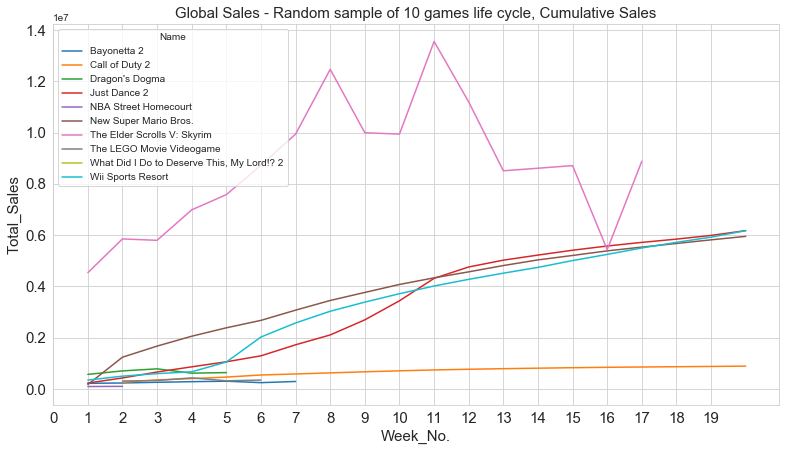

In [95]:
totaltrend = sampledata.groupby(['Name','Week_No.'])[['Total_Sales']].sum()
ax = totaltrend.reset_index().pivot(index='Week_No.',columns='Name',values='Total_Sales').plot(figsize=(13,7),fontsize=15,xticks=list(range(0,20)))
ax.set_xlabel('Week_No.', fontsize=15)
ax.set_ylabel('Total_Sales',fontsize=15)
ax.set_title('Global Sales - Random sample of 10 games life cycle, Cumulative Sales', fontsize =15)

Text(0.5,1,'Global Sales - Random sample of 10 games life cycle, Cumulative Sales')

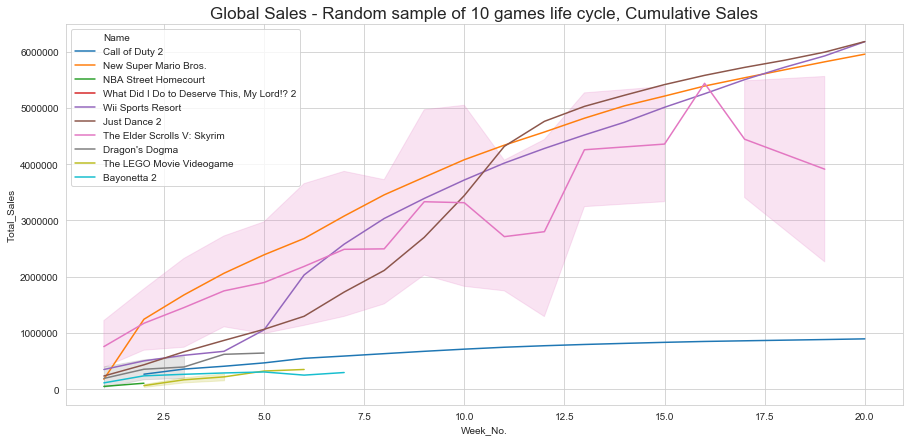

In [96]:
fig = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x='Week_No.', y='Total_Sales', hue='Name', data = sampledata)
ax.set_title('Global Sales - Random sample of 10 games life cycle, Cumulative Sales', fontsize = 17)

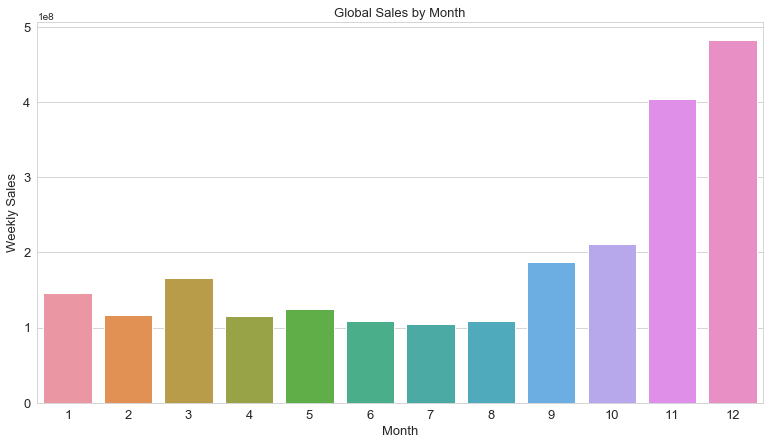

In [97]:
mon = glb.groupby(['Month'])[['Weekly_Sales']].sum().reset_index()
plt.subplots(figsize=(13,7))
ax = sns.barplot(x='Month', y='Weekly_Sales', data = mon)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Weekly Sales', fontsize=13)
plt.title('Global Sales by Month', fontsize=13)
plt.show()

In [98]:
glb.loc[glb['Name']=='007: Quantum of Solace']

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
14475,007: Quantum of Solace,X360,Activision,Action,129170,"152,863",2,2008-11-08,2008,11,8
14480,007: Quantum of Solace,PS3,Activision,Action,90427,"119,953",2,2008-11-08,2008,11,8


In [99]:
glb['Name'].nunique()

2368

In [100]:
newdf = glb.groupby(['Name', 'Week_No.'])['Weekly_Sales'].sum().reset_index()

In [101]:
newdf = newdf.pivot(index='Name',columns='Week_No.',values='Weekly_Sales')

In [102]:
newdf.loc[:,1:]

Week_No.,1,2,3,4,5,6,7,8,9,10,...,320,321,322,324,338,339,350,351,352,356
Name,,,,,,,,,,,,,,,,,,,,,
.hack//G.U. Last Recode,86008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Link,63258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,NaN,219597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-2-Switch,195332.0,59665.0,32954.0,37807.0,46428.0,41116.0,38653.0,30183.0,32614.0,29086.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 FIFA World Cup South Africa,266007.0,145736.0,105547.0,50624.0,53951.0,93052.0,49558.0,104306.0,124557.0,124920.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014 FIFA World Cup Brazil,129989.0,70984.0,30805.0,30102.0,27693.0,24686.0,30277.0,27547.0,49609.0,25339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3D Dot Game Heroes,46402.0,NaN,NaN,NaN,NaN,28218.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z Jigoku Hen,274949.0,31685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,221938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
newdf.describe()

Week_No.,-79,-46,-45,-44,-43,-42,-41,-40,-39,-38,...,320,321,322,324,338,339,350,351,352,356
count,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,2.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,16853.0,63551.0,38539.0,32357.0,28731.0,16510.000000,29932.0,32875.0,52655.0,46812.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0
std,NaN,NaN,NaN,NaN,NaN,12764.691614,NaN,NaN,NaN,12886.31398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16853.0,63551.0,38539.0,32357.0,28731.0,7484.000000,29932.0,32875.0,52655.0,37700.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0
25%,16853.0,63551.0,38539.0,32357.0,28731.0,11997.000000,29932.0,32875.0,52655.0,42256.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0
50%,16853.0,63551.0,38539.0,32357.0,28731.0,16510.000000,29932.0,32875.0,52655.0,46812.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0
75%,16853.0,63551.0,38539.0,32357.0,28731.0,21023.000000,29932.0,32875.0,52655.0,51368.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0
max,16853.0,63551.0,38539.0,32357.0,28731.0,25536.000000,29932.0,32875.0,52655.0,55924.00000,...,48620.0,30080.0,20959.0,22024.0,17420.0,16553.0,17541.0,15346.0,14223.0,18237.0


In [104]:
glb.loc[glb['Week_No.']<0]

,Name,Platform,Publisher,Genre,Weekly_Sales,Total_Sales,Week_No.,Week_Ending,Year,Month,Date
1206,Kanji Sonomama DS Rakubiki Jiten,DS,Nintendo,Misc,7484,"7,484",-42,2005-06-18,2005,6,18
2691,Clubhouse Games,DS,Nintendo,Misc,63551,"63,551",-46,2005-11-05,2005,11,5
2767,Clubhouse Games,DS,Nintendo,Misc,38539,"102,090",-45,2005-11-12,2005,11,12
2845,Clubhouse Games,DS,Nintendo,Misc,32357,"134,447",-44,2005-11-19,2005,11,19
2942,Clubhouse Games,DS,Nintendo,Misc,28731,"163,178",-43,2005-11-26,2005,11,26
3014,Clubhouse Games,DS,Nintendo,Misc,25536,"188,714",-42,2005-12-03,2005,12,3
3087,Clubhouse Games,DS,Nintendo,Misc,29932,"218,646",-41,2005-12-10,2005,12,10
3160,Clubhouse Games,DS,Nintendo,Misc,32875,"251,521",-40,2005-12-17,2005,12,17
3235,Clubhouse Games,DS,Nintendo,Misc,52655,"304,176",-39,2005-12-24,2005,12,24
3303,Clubhouse Games,DS,Nintendo,Misc,37700,"341,876",-38,2005-12-31,2005,12,31


In [105]:
condition = (glb['Year']>2004) & (glb['Month']>1)
glb.loc[condition]['Name'].nunique()

2315

In [106]:
mine = Global.loc[Global['Name']=='Minecraft']

In [107]:
mine['Total_Sales'] = mine['Total_Sales'].fillna(str(0))
mine['Total_Sales'] = mine['Total_Sales'].apply(lambda x : x.replace(',',''))

C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cleaning up cumulative sales data from sample data

In [114]:
samplepiv = sampledata.groupby(['Name','Week_No.'])[['Total_Sales']].sum()
samplepiv.reset_index()

,Name,Week_No.,Total_Sales
0,Bayonetta 2,1,223362.0
1,Bayonetta 2,2,236650.0
2,Bayonetta 2,3,263989.0
3,Bayonetta 2,4,287837.0
4,Bayonetta 2,5,305517.0
5,Bayonetta 2,6,249290.0
6,Bayonetta 2,7,295340.0
7,Call of Duty 2,2,265734.0
8,Call of Duty 2,3,356818.0
9,Call of Duty 2,4,407070.0


In [115]:
samplepiv.reset_index().pivot(index='Name',columns='Week_No.',values='Total_Sales')

Week_No.,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Name,,,,,,,,,,,,,,,,,,,,
Bayonetta 2,223362.0,236650.0,263989.0,287837.0,305517.0,249290.0,295340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call of Duty 2,NaN,265734.0,356818.0,407070.0,466743.0,548192.0,588287.0,630698.0,672618.0,710969.0,745085.0,771856.0,794320.0,813733.0,832193.0,847924.0,859557.0,870839.0,881800.0,894035.0
Dragon's Dogma,572084.0,707537.0,787626.0,619299.0,641862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Just Dance 2,233691.0,432647.0,664367.0,866626.0,1063269.0,1295486.0,1725925.0,2110340.0,2699032.0,3442062.0,4316939.0,4760981.0,5026909.0,5224779.0,5414264.0,5578410.0,5720251.0,5847399.0,5991922.0,6179004.0
NBA Street Homecourt,98156.0,105255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Super Mario Bros.,176111.0,1242103.0,1675124.0,2060392.0,2388142.0,2678321.0,3077322.0,3454417.0,3768329.0,4078780.0,4337344.0,4571056.0,4816594.0,5036813.0,5210010.0,5388868.0,5535801.0,5677745.0,5819351.0,5954928.0
The Elder Scrolls V: Skyrim,4538207.0,5855357.0,5800074.0,6988827.0,7582141.0,8728063.0,9942975.0,12470222.0,9995023.0,9943760.0,13557061.0,11196609.0,8511996.0,8612124.0,8713579.0,5436910.0,8885661.0,NaN,7821193.0,NaN
The LEGO Movie Videogame,NaN,313569.0,332117.0,436410.0,322098.0,349716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"What Did I Do to Deserve This, My Lord!? 2",65739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
weeklypiv = sampledata.groupby(['Name','Week_No.'])[['Weekly_Sales']].sum().reset_index()

In [119]:
weeklypiv = weeklypiv.pivot(index='Name',columns='Week_No.',values='Weekly_Sales')

In [120]:
weeklypiv

Week_No.,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Name,,,,,,,,,,,,,,,,,,,,
Bayonetta 2,223362.0,50461.0,27339.0,23848.0,17680.0,197087.0,46050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call of Duty 2,NaN,265734.0,91084.0,50252.0,59673.0,81449.0,40095.0,42411.0,41920.0,38351.0,34116.0,26771.0,22464.0,19413.0,18460.0,15731.0,11633.0,11282.0,10961.0,12235.0
Dragon's Dogma,572084.0,174828.0,80089.0,32168.0,22563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Just Dance 2,233691.0,198956.0,231720.0,202259.0,196643.0,232217.0,430439.0,384415.0,588692.0,743030.0,874877.0,444042.0,265928.0,197870.0,189485.0,164146.0,141841.0,127148.0,144523.0,187082.0
NBA Street Homecourt,98156.0,36300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Super Mario Bros.,176111.0,1065992.0,433020.0,385269.0,327750.0,290179.0,399001.0,377095.0,313912.0,310451.0,258563.0,233712.0,245538.0,220219.0,173197.0,178857.0,146933.0,141944.0,141607.0,135577.0
The Elder Scrolls V: Skyrim,4538207.0,1471023.0,832032.0,689081.0,1170752.0,1145922.0,1214912.0,890898.0,400278.0,182311.0,236398.0,185888.0,124584.0,100128.0,101455.0,55913.0,76410.0,NaN,64576.0,NaN
The LEGO Movie Videogame,NaN,313569.0,141932.0,104293.0,43014.0,27618.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"What Did I Do to Deserve This, My Lord!? 2",65739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
